# **About the dataset:**

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

There are 14 attributes in each case of the dataset. They are:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

Variable #14 seems to be censored at 50.00 (corresponding to a median price of \$50,000); Censoring is suggested by the fact that the highest median price of exactly \$50,000 is reported in 16 cases, while 15 cases have prices between \$40,000 and $50,000, with prices rounded to the nearest hundred.

Our goal is to select the valiables which predicts the MEDV best, also to suggest a machine learning model to predict MEDV.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score as cvs

In [2]:
#importing dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', delimiter=r'\s+', names=column_names)

In [3]:
#Top 5 rows of dataset
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
#Shape of dataset (rows, columns)
dataset.shape

(506, 14)

In [5]:
#describing the dataste to see distribution of data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From the above distribution we can see that:
1.   Variable 'ZN' is 0 for 25th and 50th percentile that will result in skweed data. This is a result of 'ZN' being a conditional variable.
2.   Also for variable 'CHAS' it's 0 for 25th, 50th and 75th percentile that will also show us that data is highly skweed. This is a result of 'CHAS' being a categorical data, contaning vaules 0 and 1 only.

Another important fact we can derive form above description is tha max value of 'MEDV' which is 50, goes along with the original data description which says : Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000)

For a start we can derive an asumption that 'ZN' and 'CHAS' variables may not be useful in predicting MEDV as they will result in biased model, so let's remove them.

In [6]:
#removing variables 'ZN' and 'CHAS' form data
dataset = dataset.drop(['ZN', 'CHAS'], axis=1)

# **Checking null values**

In [7]:
dataset.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no null values in our dataset

# **Checking and treating outliers in the data**

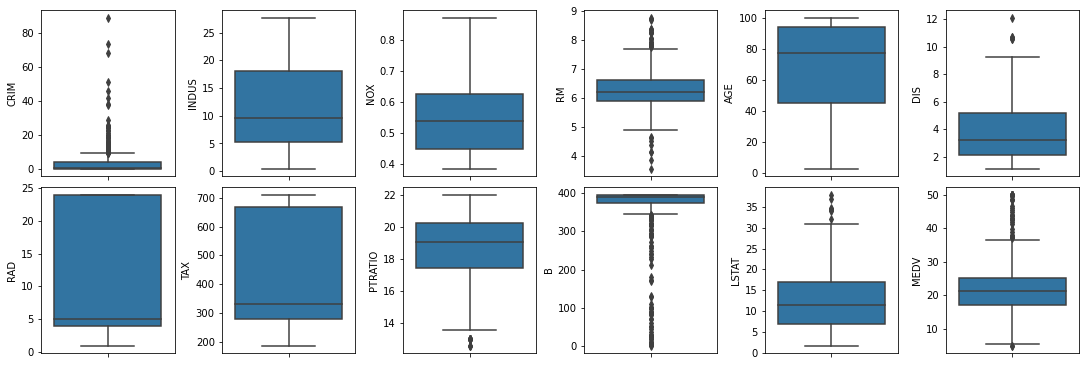

In [8]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in dataset.columns:
  sns.boxplot(y=i, data=dataset, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

Columns CRIM, RM, DIS, PTRATIO, B, LSTAT and MEDV have outliers.

In [9]:
#checking percentage/ amount of outliers
for i in dataset.columns:
  dataset.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(dataset[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = dataset[i][(dataset[i] < lower_bound) | (dataset[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/dataset[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))
  #----------------------code below is for comming sections----------------------
  if i == 'B':
    outlierDataB_index = outlier_data.index
    outlierDataB_LB = dataset[i][(dataset[i] < lower_bound)]
    outlierDataB_UB = dataset[i][(dataset[i] > upper_bound)]
  elif i == 'CRIM':
    outlierDataCRIM_index = outlier_data.index
    outlierDataCRIM_LB = dataset[i][(dataset[i] < lower_bound)]
    outlierDataCRIM_UB = dataset[i][(dataset[i] > upper_bound)]
  elif i == 'MEDV':
    lowerBoundMEDV = lower_bound
    upperBoundMEDV = upper_bound

Outliers in CRIM is 13.04% with count 66
Outliers in INDUS is 0.00% with count 0
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


Variable 'CRIM' and 'B' have high percentage of outlier data which can adversely affect the accuracy of our model.

To get rid of this we can either drop the observations or replace with some apporach like mean or median. But dropping all the outlier observations is not a good idea as we will be left with very fewer observations due to higher percentage of outliers to train our model on, also if we replace such a big percentage of the outliers with some approach (mean, median...etc.) then it might result into less accurate or biased model.

We can use an alternative : let's drop the extreme outliers and replace the remaning by some approach (mean, median.....etc.)

In [10]:
dataset2 = dataset.copy() # I copied the data in another variable just for an ease of coding, but this is not required

In [11]:
#removing extreme outliers form B and CRIM (removing those observations)
removed=[]
outlierDataB_LB.sort_values(ascending=True, inplace=True)
outlierDataB_UB.sort_values(ascending=False, inplace=True)
counter=1
for i in outlierDataB_LB.index:
  if counter<=19:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataB_UB.index:
  if counter<=38:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataB_LB.index:
  if counter<=38 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)


outlierDataCRIM_LB.sort_values(ascending=True, inplace=True)
outlierDataCRIM_UB.sort_values(ascending=False, inplace=True)
counter=1
for i in outlierDataCRIM_LB.index:
  if counter<=16 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataCRIM_UB.index:
  if counter<=33 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataCRIM_LB.index:
  if counter<=33 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)

dataset2.shape

(435, 12)

We have dropped 71 observations from our dataset, now we are left with 435 observations and 12 columns.

**Now replacing the remaning outliers with mean of each variable.**

In [12]:
dataset3 = dataset2.copy() # I copied the data in another variable just for an ease of coding, but this is not required

In [13]:
#replacing remaning outliers by mean
for i in dataset.columns:
  dataset.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(dataset[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  mean = dataset3[i].mean()
  if i != 'MEDV':
    dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
    dataset3.loc[dataset3[i] > upper_bound, [i]] = mean
  else:
    dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
    dataset3.loc[dataset3[i] > upper_bound, [i]] = 50

Below is the description of our dataset after treating the outliers:

In [14]:
dataset3.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,1.054293,10.008575,0.534257,6.266477,64.741609,4.038049,7.409195,369.232184,18.402521,388.243160,11.128671,24.502299
std,1.936962,6.741091,0.108957,0.511640,28.319794,1.960932,7.185681,146.359443,1.945860,10.759893,5.973657,9.616602
min,0.006320,0.460000,0.385000,4.903000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,6.300000
25%,0.068740,4.860000,0.445000,5.926500,40.050000,2.404500,4.000000,276.000000,17.400000,382.557563,6.545000,18.900000
50%,0.173310,8.140000,0.515000,6.230000,70.200000,3.665000,5.000000,307.000000,18.600000,392.520000,9.970000,22.200000
75%,0.846290,18.100000,0.585000,6.550500,91.550000,5.400900,6.000000,403.000000,20.200000,396.260000,14.655000,27.100000
max,8.982960,27.740000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,50.000000


# **Selecting the features which can predict MEDV the best**

**Using p-Value to to select the optimal features:**

Dropping all the variables whose p-value is less than significance level of 0.05 using backward elimination method

In [15]:
#independent variable(X) and dependent variable(Y)
X = dataset3.iloc[:, :-1]
Y = dataset3.iloc[:, 11]

In [16]:
#Feature selection using P-Value/ Backward elimination
def BackwardElimination(sl, w):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog=Y, exog=w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > SL:
            index_max_pvalue = pvalues[pvalues==max_pvalue].index
            w = w.drop(index_max_pvalue, axis = 1) #delete the valriable for that p value
    return w,pvalues,index_max_pvalue

SL = 0.05
ones = np.ones((435,1))  #adding a columns of ones to X as it is required by statsmodels library
W = X
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]

W_optimal,pvalues,index_max_pvalue = BackwardElimination(SL, W_optimal)
X = W_optimal.drop('Constant', axis=1)

In [17]:
#remaning variabls after backward elimination
X.columns

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

**Using pearson correlation to remove any highly correlated independent variables to avoid multicollinearity :**

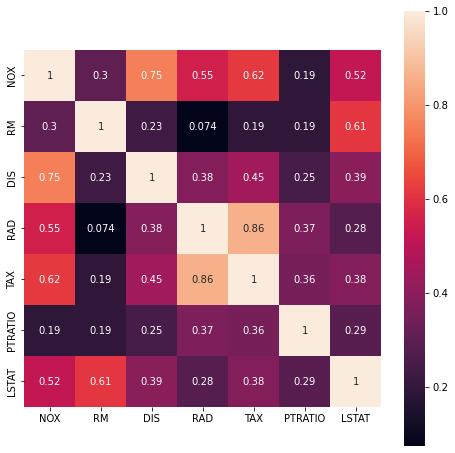

In [18]:
#Ploting heatmap using pearson correlation among independent variables
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

From above correlation heatmap we can see that:
1.   TAX and RAD are highly correlated with score 0.86. As per my personal understandig RAD (index of accessibility to radial highways) will be more important in predicting MEDV as commpared to TAX (full-value property-tax rate per $10,000), so I am considering to drop TAX
2.   DIS and NOX are highly correlated with score 0.75. As per my personal understandig DIS (weighted distances to five Boston employment centres) will be more important in predicting MEDV as commpared to NOX (nitric oxides concentration (parts per 10 million)), so I am considering to drop NOX



In [19]:
#dropping TAX and NOX
X.drop('TAX', axis=1, inplace=True)
X.drop('NOX', axis=1, inplace=True)

#remaning columns after removing multicollinearity
X.columns

Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

**Checking correlation of remaning independent variables with MEDV using Pearson correlation method**

In [20]:
#now checking correlation of each variable with MEDV by pearson method and dropping the one with least correlation with MEDV
for i in X.columns:
  corr, _ = pearsonr(X[i], Y)
  print(i,corr)

RM 0.5619541568173062
DIS 0.10793693577397612
RAD -0.16919893157675941
PTRATIO -0.38055803676641997
LSTAT -0.6793276769216394


We can see that DIS and RAD are least correlated to MEDV, so dropping DIS and RAD

In [21]:
X.drop(['DIS', 'RAD'], axis=1, inplace=True)

In [22]:
#remaning variables/ features that can predict the MEDV most
X.columns

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

From the above feature selection process we conclude that features *RM*, *PTRATIO* and *LSAT* can alone predict MEDV the best

# **Machine learning**

This is a regression a problem as we have to predict a continous (non catagorical) value.

Implementing regression machine learning models to out our dataset (using the remaing independent variables) to predict MEDV

In [23]:
#spliting data into traning set and test set
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=0)

**Linear regression model:**

In [24]:
linear = lr()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_linear.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,30.992768
269,20.7,21.073716
54,18.9,17.575853
360,25.0,25.980258
499,17.5,17.814795


**Polynomial regression model:**

In [25]:
polyRegressor = PolynomialFeatures(degree=3)
X_train_poly = polyRegressor.fit_transform(X_train)
X_test_poly = polyRegressor.fit_transform(X_test)
poly = lr()
poly.fit(X_train_poly, Y_train)
Y_pred = poly.predict(X_test_poly)
Y_compare_poly = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_poly.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,32.860285
269,20.7,19.674236
54,18.9,15.952153
360,25.0,23.712803
499,17.5,18.331182


**Support vector regression model:**

In [26]:
svr = SVR(kernel= 'poly', gamma='scale')
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
Y_compare_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_svr.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,26.297366
269,20.7,19.596855
54,18.9,15.838815
360,25.0,24.115036
499,17.5,17.335738


**Decission tree regression model:**

In [27]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,22.599
269,20.7,21.701
54,18.9,17.760
360,25.0,23.597
499,17.5,20.488


**K-Nearest Neighbour regression model:**

In [28]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_knn.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,30.530769
269,20.7,20.346154
54,18.9,18.646154
360,25.0,22.384615
499,17.5,19.315385


**Plotting compariasion of actual and predicted values of MEDV that we got using different machine learning models**

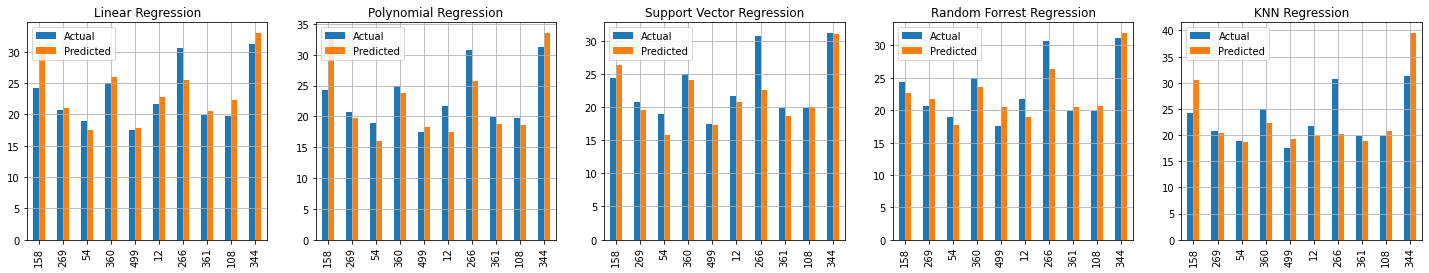

In [29]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_poly.head(10).plot(kind='bar', title='Polynomial Regression', grid=True, ax=ax[1])
Y_compare_svr.head(10).plot(kind='bar', title='Support Vector Regression', grid=True, ax=ax[2])
Y_compare_randomforrest.head(10).plot(kind='bar', title='Random Forrest Regression', grid=True, ax=ax[3])
Y_compare_knn.head(10).plot(kind='bar', title='KNN Regression', grid=True, ax=ax[4])
plt.show()

**Scores (R squared) of different machine learning models using K-fold cross validation:**

In [30]:
print('According to R squared scorring method we got below scores for out machine learning models:')
modelNames = ['Linear', 'Polynomial', 'Support Vector', 'Random Forrest', 'K-Nearest Neighbour']
modelRegressors = [linear, poly, svr, rf, knn]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0
score=[]
for i in models['modelRegressors']:
  if i is poly:
    accuracy = cvs(i, X_train_poly, Y_train, scoring='r2', cv=5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
  else:
    accuracy = cvs(i, X_train, Y_train, scoring='r2', cv=5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
  counter+=1

According to R squared scorring method we got below scores for out machine learning models:
Accuracy of Linear Regression model is 0.51
Accuracy of Polynomial Regression model is 0.64
Accuracy of Support Vector Regression model is 0.50
Accuracy of Random Forrest Regression model is 0.72
Accuracy of K-Nearest Neighbour Regression model is 0.64


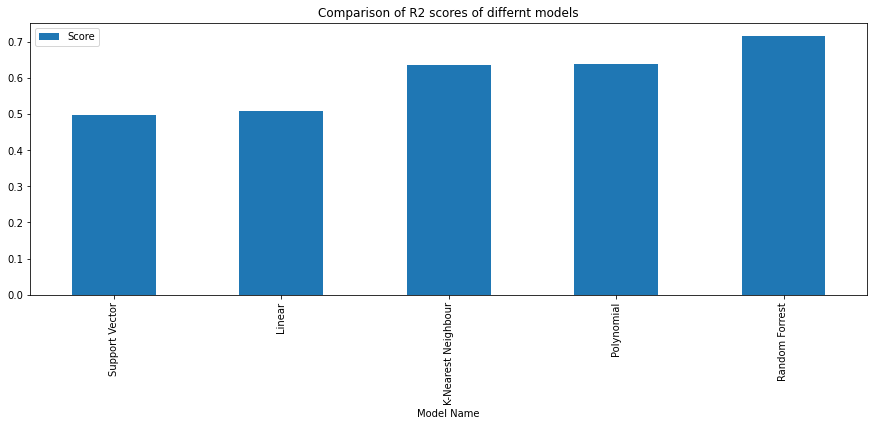

In [31]:
pd.DataFrame({'Model Name' : modelNames,'Score' : score}).sort_values(by='Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(15,5), title='Comparison of R2 scores of differnt models', )
plt.show()

From the above visualiation we can summarise that Random Forrest (r2 = 0.72) machine learning model gives the best score and we can use it to predict the values of MEDV the best.

However other models like Polynomial (r2 = 0.64) regression model and KNN (r2 = 0.64)regression model also have comparable score to Random Forrest and hence can also be used to make predictions of MEDV.

# **Final summary**

**From above data engineering and machine learning techniques we can conclude that:**

1.   Features RM, PTRATIO and LSAT are alone capable of predicting MEDV to a good accuracy
2.   Random Forrest regression model (with 100 estimators) can be considered as a good model for predictiong MEDV using the above mentioned three features.
3.   However Polynomial and KNN regression models can also be used as an alternative to Random Forrest.
4.   Linear and Support Vector regression models shows the least r2 score, which can be considered bad models for predicting MEDV.

